In [ ]:
# Notebook to study different definitions obtained for the class babies

In [ ]:
GROQ_KEY = ""
OPENAI_KEY = "sk-or-v1-..."
OPENAI_KEY = "sk-or-v1-..."
GENAI_KEY = "AIzaSyCyu-..."

In [9]:
# Use wordnet for small definition
import nltk
from nltk.corpus import wordnet as wn
from transformers import pipeline

def get_wordnet_definition(class_name):
    synsets = wn.synsets(class_name)
    if synsets:
        return [s.definition() for s in synsets]
    return None

In [71]:
get_wordnet_definition("baby")

['a very young child (birth to 1 year) who has not yet begun to walk or talk',
 'the youngest member of a group (not necessarily young)',
 'an immature childish person',
 'an unborn child; a human fetus',
 '(slang) sometimes used as a term of address for attractive young women',
 'a very young mammal',
 'a project of personal concern to someone',
 'treat with excessive indulgence']

In [20]:
from openai import OpenAI

# Testing multiple OpenAI models

models = [
    "google/gemini-2.0-flash-exp:free",
    #"meta-llama/llama-4-scout:free", # limited input tokens?
    #"meta-llama/llama-4-maverick:free", # no images
    "mistralai/mistral-small-3.1-24b-instruct:free", 
    "qwen/qwen2.5-vl-72b-instruct:free",
    "google/gemma-3-27b-it:free",
    #"deepseek/deepseek-r1:free"
]

from openai import OpenAI
import base64

# Helper function to convert image to base64
def encode_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode("utf-8")

img_path = "/Users/jdieguez/Documents/master/TFM/code/cifar-fs/test/man/abel_s_000001.png"
base64_image = encode_image(img_path)

client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=OPENAI_KEY,
)

for model in models:
    completion = client.chat.completions.create(
        model=model,
        messages=[{
                "role": "user",
                "content": [{
                        "type": "text",
                        "text": "Briefly describe what is in this image."
                    }, {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}",},
                    }]}])
    print(completion)
    answer = completion.choices[0].message.content
    print(f"Model: {model}\n{answer}\n\n")

ChatCompletion(id='gen-1751132239-iKTpEZ6xeDLVry9Nf0Nu', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="The image appears to be a black and white portrait of a person. Due to the blurriness, it's difficult to discern details, but it seems to be a person with short, dark hair and what looks like a dark jacket or coat. The person is gazing downward or to the side.\n", refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=None, reasoning=None), native_finish_reason='STOP')], created=1751132240, model='google/gemini-2.0-flash-exp:free', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=62, prompt_tokens=267, total_tokens=329, completion_tokens_details=None, prompt_tokens_details=None), provider='Google')
Model: google/gemini-2.0-flash-exp:free
The image appears to be a black and white portrait of a person. Due to the blurriness, it's diffi

KeyboardInterrupt: 

# New prompts

New prompts:

0. f'"{definition}" is the definition of the {class_name}. Please rewrite and expand this definition to make it more detailed and consistent with scientific fact. Briefness is required, using only one paragraph.'

1. f"Please write a detailed visual definition of the class {cls}. Make it more visually detailed and consistent with scientific fact for a IA model to differentiate it from this class to other classes like {set(class_names) - set([cls])}. Briefness is required, using only one paragraph."

2. f'"{definition}" is the definition of the {class_name}. Please rewrite and expand this into a short, factual, and visually detailed description, focused on what makes the {class_name} visually distinctive. Avoid mentioning other categories. Use only one paragraph.'

3. f'"{definition}" is the definition of the {class_name}. Rewrite and enrich it by emphasizing visual and physical features that are commonly misunderstood in classification. Make the description especially helpful for an AI model that needs to distinguish the {class_name} clearly from visually similar categories. Write only one paragraph, about the {class_name} alone.'

4. f'"{definition}" is the definition of the {class_name}. Please rewrite and enhance it to make it visually descriptive and scientifically precise. Focus on the traits that make the {class_name} visually distinct from similar categories like {confused_with_str}, but write only about the {class_name} itself. Limit to one paragraph.

5. f"Write a short, visually detailed description of the class '{class_name}' that will help a vision model correctly recognize and distinguish it from other classes. Focus only on unique and visible traits such as color, shape, texture, size, or key parts. Do not mention other classes. Limit to a single paragraph."

6. f"The following is a definition of the class '{class_name}': \"{definition}\". Using this as context (only if useful), write a short visual description to help an AI model recognize '{class_name}' based on appearance alone. Do not include other classes. One paragraph only."



   confused_with_str = ", ".join(confused_with)

In [3]:
class_name = 'baby'
definition = "a very young child (birth to 1 year) who has not yet begun to walk or talk"
confused_with = ['boy', 'girl', 'apple', 'man', 'house']
confused_with_str = ", ".join(confused_with)
class_names = ['apple', 'aquarium_fish', 'bear', 'bee', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'can', 'castle', 'caterpillar', 'chair', 'clock', 'cloud', 'cockroach', 'couch', 'cup', 'dinosaur', 'dolphin', 'elephant', 'forest', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lawn_mower', 'lion', 'lizard', 'lobster', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'palm_tree', 'pear', 'pine_tree', 'plate', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'seal', 'shrew', 'skunk', 'skyscraper', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'tank', 'tiger', 'train', 'trout', 'tulip', 'turtle', 'willow_tree', 'wolf', 'beaver', 'beetle', 'butterfly', 'camel', 'cattle', 'crab', 'crocodile', 'flatfish', 'lamp', 'maple_tree', 'motorcycle', 'otter', 'sea', 'shark', 'television', 'tractor', 'baby', 'bed', 'bicycle', 'chimpanzee', 'fox', 'leopard', 'man', 'pickup_truck', 'plain', 'poppy', 'rocket', 'rose', 'snail', 'sweet_pepper', 'table', 'telephone', 'wardrobe', 'whale', 'woman', 'worm']

In [73]:
from groq import Groq

client = Groq(api_key=GROQ_KEY)

prompts = [
    f'"{definition}" is the definition of the {class_name}. Please rewrite and expand this definition to make it more detailed and consistent with scientific fact. Briefness is required, using only one paragraph.',
    #f"Please write a detailed visual definition of the class {cls}. Make it more visually detailed and consistent with scientific fact for a IA model to differentiate it from this class to other classes like {set(class_names) - set([cls])}. Briefness is required, using only one paragraph.",
    #f'"{definition}" is the definition of the {class_name}. Please rewrite and expand this into a short, factual, and visually detailed description, focused on what makes the {class_name} visually distinctive. Avoid mentioning other categories. Use only one paragraph.',
    #f'"{definition}" is the definition of the {class_name}. Rewrite and enrich it by emphasizing visual and physical features that are commonly misunderstood in classification. Make the description especially helpful for an AI model that needs to distinguish the {class_name} clearly from visually similar categories. Write only one paragraph, about the {class_name} alone.',
    #f'"{definition}" is the definition of the {class_name}. Please rewrite and enhance it to make it visually descriptive and scientifically precise. Focus on the traits that make the {class_name} visually distinct from similar categories like {confused_with_str}, but write only about the {class_name} itself. Limit to one paragraph.',
    f"Write a short, visually detailed description of the class '{class_name}' that will help a vision model correctly recognize and distinguish it from other classes. Focus only on unique and visible traits such as color, shape, texture, size, or key parts. Do not mention other classes. Limit to a single paragraph.",
    f"The following is a definition of the class '{class_name}': \"{definition}\". Using this as context (only if useful), write a short visual description to help an AI model recognize '{class_name}' based on appearance alone. Do not include other classes. One paragraph only.",
    f"Define visually the class '{class_name}', focusing on visual and physical. Also, focus on the traits that make the {class_name} visually distinct from similar categories like {confused_with_str}. Briefness is required, using only one paragraph.",
]

for prompt in prompts:
    messages = [{
        "role": "user",
        "content": [{"type": "text", "text": prompt}]
    }]
    
    response = client.chat.completions.create(
        model="meta-llama/llama-4-scout-17b-16e-instruct",
        messages=messages,
    )
    description = response.choices[0].message.content.strip()
    print(description)
    print()

A baby, also known as an infant, refers to a very young child from birth to approximately 1 year of age, characterized by significant physical and cognitive development. At this stage, the infant has not yet begun to walk or talk, relying on caregivers for mobility, nutrition, and communication. Typically, infants start to discover their environment, develop basic reflexes, and begin to interact through cooing and facial expressions. As they progress, they start to gain control over their muscles, leading to rolling, sitting, and eventually crawling. By around 9-12 months, most infants start to say a few words and may take their first steps, marking the beginning of toddlerhood. Throughout the first year, babies undergo rapid growth, and their cognitive, emotional, and social skills begin to unfold, laying the foundation for future developmental milestones.

The class 'baby' typically refers to a human infant. A baby is characterized by a small, rounded body with a large head in propor

In [51]:
# Testing multiple OpenAI models

prompt = f"'{definition}' is the definition of the {class_name}. Using this as context (only if useful), write a short visual description to help an AI model recognize '{class_name}' based on appearance alone. One paragraph only."

models = [
    #"google/gemini-2.0-flash-exp:free",
    "meta-llama/llama-4-scout:free", # limited input tokens?
    "meta-llama/llama-4-maverick:free", # no images
    "mistralai/mistral-small-3.1-24b-instruct:free", 
    "qwen/qwen2.5-vl-72b-instruct:free",
    "google/gemma-3-27b-it:free",
    "deepseek/deepseek-r1:free"
]

from openai import OpenAI

client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=OPENAI_KEY,
)

for model in models:
    completion = client.chat.completions.create(
        model=model,
        messages=[{
                "role": "user",
                "content": [{
                        "type": "text",
                        "text": prompt
                    }]}])
    answer = completion.choices[0].message.content.strip()
    print(f"Model: {model}\n{answer}\n\n")

Model: meta-llama/llama-4-scout:free
A baby is typically a small, helpless, and endearing individual with a relatively large head, round face, and soft, underdeveloped features. They often have a chubby or plump appearance with short limbs, and their skin is usually smooth and delicate. Their hair is typically fine and sparse, and their eyes are large in proportion to their face. They may have a rounded forehead, a short nose, and a mouth with a small, button-like appearance. Overall, the baby's physical appearance conveys a sense of vulnerability, fragility, and innocence.


Model: meta-llama/llama-4-maverick:free
A baby is typically a small, chubby, and relatively helpless human with a large head in proportion to their body. They usually have soft, smooth skin and a rounded face with a short neck. Their limbs are short and stumpy, and they often have a somewhat disproportional body, with a larger torso and a relatively small lower body. They may be bald or have a thin layer of hair, 

KeyboardInterrupt: 

In [45]:
import json
import time
import google.generativeai as genai
from google.api_core.exceptions import ResourceExhausted


genai.configure(api_key=GENAI_KEY)
model = genai.GenerativeModel('gemini-2.0-flash-lite')

with open("TFM-SemFew/wn_descriptions.json", 'r') as f:
    wn = json.load(f)

with open("TFM-SemFew/most_confused.json", 'r') as f:
    mc = json.load(f)

descriptions = {}
for class_name in class_names:
    definition = wn[class_name]
    confused_with = mc[class_name]
    confused_with_str = ", ".join(confused_with)

    prompt = f"The following is a definition of the class '{class_name}': \"{definition}\". Using this as context (only if useful), write a short visual description to help an AI model recognize '{class_name}' based on appearance alone. Do not include other classes. One paragraph only."
    #prompt = f"Define visually the class '{class_name}', focusing on visual and physical. Also, focus on the traits that make the {class_name} visually distinct from similar categories like {confused_with_str}. Do not mention other classes. Briefness is required, using only one paragraph."
    
    #messages = [{
    #    "role": "user",
    #    "content": [{"type": "text", "text": prompt}]
    #}]
    
    #response = client.chat.completions.create(
    #    model="meta-llama/llama-4-scout-17b-16e-instruct",
    #    messages=messages,
    #)
    #description = response.choices[0].message.content.strip()

    max_attempts = 5  # Number of retry attempts
    success = False
    attempt = 0
    while attempt < max_attempts and not success:
        try:
            response = model.generate_content([prompt], stream=True)
            response.resolve()
            description = response.text.strip()
            descriptions[class_name] = description
            print(class_name)
            success = True

        except ResourceExhausted as e:
            retry_delay = 60 #+ attempt * 30
            print(f"⚠️ Quota limit reached. Waiting {retry_delay} seconds before retrying... (Attempt {attempt + 1}/{max_attempts})")
            time.sleep(retry_delay)
            attempt += 1

        except Exception as e:
            print(f"❌ Unexpected error for class '{cls}': {e}")
            break

    if not success:
        print(f"❌ Failed to get description for '{cls}' after {max_attempts} attempts.")

    

apple
aquarium_fish
bear
bee
bottle
bowl
boy
bridge
bus
can
castle
caterpillar
chair
clock
cloud
cockroach
couch
cup
dinosaur
dolphin
elephant
forest
girl
hamster
house
kangaroo
keyboard
lawn_mower
lion
lizard
lobster
⚠️ Quota limit reached. Waiting 60 seconds before retrying... (Attempt 1/5)
mountain
mouse
mushroom
oak_tree
orange
orchid
palm_tree
pear
pine_tree
plate
porcupine
possum
rabbit
raccoon
ray
road
seal
shrew
skunk
skyscraper
snake
spider
squirrel
streetcar
sunflower
tank
tiger
train
trout
tulip
turtle
willow_tree
wolf
beaver
beetle
butterfly
camel
cattle
crab
⚠️ Quota limit reached. Waiting 60 seconds before retrying... (Attempt 1/5)
crocodile
flatfish
lamp
maple_tree
motorcycle
otter
sea
shark
television
tractor
baby
bed
bicycle
chimpanzee
fox
leopard
man
pickup_truck
plain
poppy
rocket
rose
snail
sweet_pepper
table
telephone
wardrobe
whale
woman
worm


In [46]:
with open("TFM-SemFew/gemini_prompt2.json", "w") as f:
    json.dump(descriptions, f, indent=2)

In [17]:
# Testing multiple OpenAI models

import time
import json
from openai import OpenAI, RateLimitError

 
#class_names = ['apple', 'aquarium_fish', 'bear', 'bee', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'can', 'castle', 'caterpillar', 'chair', 'clock', 'cloud', 'cockroach', 'couch', 'cup', 'dinosaur', 'dolphin', 'elephant', 'forest', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lawn_mower', 'lion', 'lizard', 'lobster', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'palm_tree', 'pear', 'pine_tree', 'plate', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'seal', 'shrew', 'skunk', 'skyscraper', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'tank', 'tiger', 'train', 'trout', 'tulip', 'turtle', 'willow_tree', 'wolf', 'beaver', 'beetle', 'butterfly', 'camel', 'cattle', 'crab', 'crocodile', 'flatfish', 'lamp', 'maple_tree', 'motorcycle', 'otter', 'sea', 'shark', 'television', 'tractor', 'baby', 'bed', 'bicycle', 'chimpanzee', 'fox', 'leopard', 'man', 'pickup_truck', 'plain', 'poppy', 'rocket', 'rose', 'snail', 'sweet_pepper', 'table', 'telephone', 'wardrobe', 'whale', 'woman', 'worm']
class_names = ['organ', 'cocktail_shaker', 'goose', 'file', 'jellyfish', 'missile', 'coral_reef', 'black-footed_ferret', 'lipstick', 'rhinoceros_beetle', 'stage', 'theater_curtain', 'Newfoundland', 'scoreboard', 'robin', 'hotdog', 'upright', 'lion', 'unicycle', 'Saluki', 'solar_dish', 'rock_beauty', 'ashcan', 'hourglass', 'white_wolf', 'horizontal_bar', 'three-toed_sloth', 'prayer_rug', 'toucan', 'combination_lock', 'garbage_truck', 'malamute', 'mixing_bowl', 'house_finch', 'reel', 'tank', 'triceratops', 'consomme', 'miniature_poodle', 'nematode', 'carton', 'golden_retriever', 'poncho', 'miniskirt', 'king_crab', 'meerkat', 'electric_guitar', 'wok', 'dalmatian', 'tile_roof', 'ladybug', 'parallel_bars', 'catamaran', 'green_mamba', 'orange', 'dome', 'dugong', 'tobacco_shop', 'Gordon_setter', 'pencil_box', 'street_sign', 'barrel', 'fire_screen', 'yawl', 'Walker_hound', 'boxer', 'photocopier', 'cuirass', 'slot', 'harvestman', 'clog', 'bookshop', 'frying_pan', 'crate', 'aircraft_carrier', 'chime', 'Ibizan_hound', 'dishrag', 'iPod', 'holster', 'worm_fence', 'ear', 'vase', 'beer_bottle', 'spider_web', 'komondor', 'bolete', 'trifle', 'African_hunting_dog', 'cliff', 'oboe', 'carousel', 'cannon', 'French_bulldog', 'school_bus', 'Tibetan_mastiff', 'snorkel', 'ant', 'hair_slide', 'Arctic_fox']

models = [
    #"google/gemini-2.0-flash-exp:free",
    #"meta-llama/llama-4-scout:free", # limited input tokens?
    #"meta-llama/llama-4-maverick:free", # no images
    #"mistralai/mistral-small-3.1-24b-instruct:free", 
    #"qwen/qwen2.5-vl-72b-instruct:free",
    #"google/gemma-3-27b-it:free",
    "deepseek/deepseek-r1:free"
]

from openai import OpenAI

client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=OPENAI_KEY,
)

with open("TFM-SemFew/wn_descriptions.json", 'r') as f:
    wn = json.load(f)

with open("TFM-SemFew/most_confused.json", 'r') as f:
    mc = json.load(f)

for model in models:
    descriptions = {}
    for class_name in class_names:
        definition = wn[class_name]
        #confused_with = mc[class_name]
        confused_with_str = ", ".join(confused_with)
        # Improved prompt:
        prompt = f"'{definition}' is the definition of the {class_name}. Using this as context (only if useful), write a short visual description to help an AI model recognize '{class_name}' based on appearance alone. One paragraph only."
        # Original prompt:
        #prompt = f'"{definition}" is the definition of the {class_name}. Please rewrite and expand this definition to make it more detailed and consistent with scientific fact. Briefness is required, using only one paragraph.'

        max_attempts = 2  # Number of retry attempts
        success = False
        attempt = 0
        while attempt < max_attempts and not success:
            try:
                completion = client.chat.completions.create(
                    model=model,
                    messages=[{
                            "role": "user",
                            "content": [{
                                    "type": "text",
                                    "text": prompt
                                }]}])
                description = completion.choices[0].message.content.strip()
                descriptions[class_name] = description
                success = True
                print(f"\t{class_name}")

            except RateLimitError as e:
                print(f"\t⏳ Rate limit hit for {model}. Waiting 60 seconds before retrying (Attempt {attempt+1}/{max_attempts})...")
                time.sleep(60)
                attempt += 1

            except Exception as e:
                print(f"\t❌ Unexpected error for {class_name} on {model}: {e}")
                break  # Optional: remove this if you want to keep retrying for other classes even after an error
            
        
    with open(f"TFM-SemFew/{model.replace('/', '_')}_mini_img_descriptions.json", "w") as f:
        json.dump(descriptions, f, indent=2)
    print(model)

	organ
	cocktail_shaker
	goose
	file
	jellyfish
	missile
	coral_reef
	black-footed_ferret
	lipstick
	rhinoceros_beetle
	stage
	theater_curtain
	Newfoundland
	scoreboard
	robin
	hotdog
	upright
	lion
	unicycle
	Saluki
	solar_dish
	rock_beauty
	ashcan
	hourglass
	white_wolf
	horizontal_bar
	three-toed_sloth
	prayer_rug
	toucan
	combination_lock
	garbage_truck
	malamute
	mixing_bowl
	house_finch
	reel
	tank
	triceratops
	consomme
	miniature_poodle
	nematode
	carton
	golden_retriever
	poncho
	miniskirt
	king_crab
	meerkat
	electric_guitar
	wok
	dalmatian
	tile_roof
	ladybug
	parallel_bars
	catamaran
	green_mamba
	orange
	dome
	dugong
	tobacco_shop
	Gordon_setter
	pencil_box
	street_sign
	barrel
	fire_screen
	yawl
	Walker_hound
	boxer
	photocopier
	cuirass
	slot
	harvestman
	clog
	bookshop
	frying_pan
	crate
	aircraft_carrier
	chime
	Ibizan_hound
	dishrag
	iPod
	holster
	worm_fence
	ear
	vase
	beer_bottle
	spider_web
	komondor
	bolete
	trifle
	African_hunting_dog
	cliff
	oboe
	carousel
	can

In [65]:
f"TFM-SemFew/{model.replace('/', '_')}_descriptions.json"
models = [
    #"google/gemini-2.0-flash-exp:free",
    "meta-llama/llama-4-scout:free", # limited input tokens?
    "meta-llama/llama-4-maverick:free", # no images
    "mistralai/mistral-small-3.1-24b-instruct:free", 
    "qwen/qwen2.5-vl-72b-instruct:free",
    "google/gemma-3-27b-it:free",
    "deepseek/deepseek-r1:free"
]
for model in models:
    print(f"{model.replace('/', '_')}_descriptions.json")

meta-llama_llama-4-scout:free_descriptions.json
meta-llama_llama-4-maverick:free_descriptions.json
mistralai_mistral-small-3.1-24b-instruct:free_descriptions.json
qwen_qwen2.5-vl-72b-instruct:free_descriptions.json
google_gemma-3-27b-it:free_descriptions.json
deepseek_deepseek-r1:free_descriptions.json


# Study k

In [22]:
text = """k = 0.0, ACC = 0.9333333373069763
k = 0.01, ACC = 0.9333333373069763
k = 0.02, ACC = 0.9333333373069763
k = 0.03, ACC = 0.9333333373069763
k = 0.04, ACC = 0.9333333373069763
k = 0.05, ACC = 0.9466666579246521
k = 0.06, ACC = 0.9466666579246521
k = 0.07, ACC = 0.9466666579246521
k = 0.08, ACC = 0.9466666579246521
k = 0.09, ACC = 0.9466666579246521
k = 0.1, ACC = 0.9466666579246521
k = 0.11, ACC = 0.9599999785423279
k = 0.12, ACC = 0.9599999785423279
k = 0.13, ACC = 0.9599999785423279
k = 0.14, ACC = 0.9599999785423279
k = 0.15, ACC = 0.9599999785423279
k = 0.16, ACC = 0.9599999785423279
k = 0.17, ACC = 0.9599999785423279
k = 0.18, ACC = 0.9599999785423279
k = 0.19, ACC = 0.9599999785423279
k = 0.2, ACC = 0.9599999785423279
k = 0.21, ACC = 0.9466666579246521
k = 0.22, ACC = 0.9466666579246521
k = 0.23, ACC = 0.9333333373069763
k = 0.24, ACC = 0.9333333373069763
k = 0.25, ACC = 0.9333333373069763
k = 0.26, ACC = 0.9333333373069763
k = 0.27, ACC = 0.9333333373069763
k = 0.28, ACC = 0.9466666579246521
k = 0.29, ACC = 0.9466666579246521
k = 0.3, ACC = 0.9466666579246521
k = 0.31, ACC = 0.9466666579246521
k = 0.32, ACC = 0.9466666579246521
k = 0.33, ACC = 0.9466666579246521
k = 0.34, ACC = 0.9466666579246521
k = 0.35000000000000003, ACC = 0.9466666579246521
k = 0.36, ACC = 0.9466666579246521
k = 0.37, ACC = 0.9466666579246521
k = 0.38, ACC = 0.9466666579246521
k = 0.39, ACC = 0.9466666579246521
k = 0.4, ACC = 0.9466666579246521
k = 0.41000000000000003, ACC = 0.9466666579246521
k = 0.42, ACC = 0.9466666579246521
k = 0.43, ACC = 0.9466666579246521
k = 0.44, ACC = 0.9466666579246521
k = 0.45, ACC = 0.9466666579246521
k = 0.46, ACC = 0.9466666579246521
k = 0.47000000000000003, ACC = 0.9466666579246521
k = 0.48, ACC = 0.9466666579246521
k = 0.49, ACC = 0.9466666579246521
k = 0.5, ACC = 0.9466666579246521
k = 0.51, ACC = 0.9466666579246521
k = 0.52, ACC = 0.9466666579246521
k = 0.53, ACC = 0.9466666579246521
k = 0.54, ACC = 0.9466666579246521
k = 0.55, ACC = 0.9466666579246521
k = 0.56, ACC = 0.9466666579246521
k = 0.5700000000000001, ACC = 0.9466666579246521
k = 0.58, ACC = 0.9466666579246521
k = 0.59, ACC = 0.9466666579246521
k = 0.6, ACC = 0.9466666579246521
k = 0.61, ACC = 0.9466666579246521
k = 0.62, ACC = 0.9466666579246521
k = 0.63, ACC = 0.9466666579246521
k = 0.64, ACC = 0.9466666579246521
k = 0.65, ACC = 0.9466666579246521
k = 0.66, ACC = 0.9466666579246521
k = 0.67, ACC = 0.9333333373069763
k = 0.68, ACC = 0.9333333373069763
k = 0.6900000000000001, ACC = 0.9333333373069763
k = 0.7000000000000001, ACC = 0.9333333373069763
k = 0.71, ACC = 0.9333333373069763
k = 0.72, ACC = 0.9200000166893005
k = 0.73, ACC = 0.9200000166893005
k = 0.74, ACC = 0.9200000166893005
k = 0.75, ACC = 0.9200000166893005
k = 0.76, ACC = 0.9200000166893005
k = 0.77, ACC = 0.9200000166893005
k = 0.78, ACC = 0.9200000166893005
k = 0.79, ACC = 0.9200000166893005
k = 0.8, ACC = 0.9200000166893005
k = 0.81, ACC = 0.9200000166893005
k = 0.8200000000000001, ACC = 0.9200000166893005
k = 0.8300000000000001, ACC = 0.9200000166893005
k = 0.84, ACC = 0.9200000166893005
k = 0.85, ACC = 0.9200000166893005
k = 0.86, ACC = 0.9200000166893005
k = 0.87, ACC = 0.9200000166893005
k = 0.88, ACC = 0.9200000166893005
k = 0.89, ACC = 0.9066666960716248
k = 0.9, ACC = 0.9066666960716248
k = 0.91, ACC = 0.9066666960716248
k = 0.92, ACC = 0.8933333158493042
k = 0.93, ACC = 0.8933333158493042
k = 0.9400000000000001, ACC = 0.8933333158493042
k = 0.9500000000000001, ACC = 0.8933333158493042
k = 0.96, ACC = 0.8933333158493042
k = 0.97, ACC = 0.8933333158493042
k = 0.98, ACC = 0.8933333158493042
k = 0.99, ACC = 0.8933333158493042
k = 1.0, ACC = 0.8799999952316284"""
k_data = text.replace(" ", "").split("\n")
k_data = [k.split(",") for k in k_data]
k_values = {}
for k in k_data:
    i, j = k
    key = float(i.split("=")[1])
    value = float(j.split("=")[1])
    k_values[key] = value
k_values

{0.0: 0.9333333373069763,
 0.01: 0.9333333373069763,
 0.02: 0.9333333373069763,
 0.03: 0.9333333373069763,
 0.04: 0.9333333373069763,
 0.05: 0.9466666579246521,
 0.06: 0.9466666579246521,
 0.07: 0.9466666579246521,
 0.08: 0.9466666579246521,
 0.09: 0.9466666579246521,
 0.1: 0.9466666579246521,
 0.11: 0.9599999785423279,
 0.12: 0.9599999785423279,
 0.13: 0.9599999785423279,
 0.14: 0.9599999785423279,
 0.15: 0.9599999785423279,
 0.16: 0.9599999785423279,
 0.17: 0.9599999785423279,
 0.18: 0.9599999785423279,
 0.19: 0.9599999785423279,
 0.2: 0.9599999785423279,
 0.21: 0.9466666579246521,
 0.22: 0.9466666579246521,
 0.23: 0.9333333373069763,
 0.24: 0.9333333373069763,
 0.25: 0.9333333373069763,
 0.26: 0.9333333373069763,
 0.27: 0.9333333373069763,
 0.28: 0.9466666579246521,
 0.29: 0.9466666579246521,
 0.3: 0.9466666579246521,
 0.31: 0.9466666579246521,
 0.32: 0.9466666579246521,
 0.33: 0.9466666579246521,
 0.34: 0.9466666579246521,
 0.35000000000000003: 0.9466666579246521,
 0.36: 0.94666665

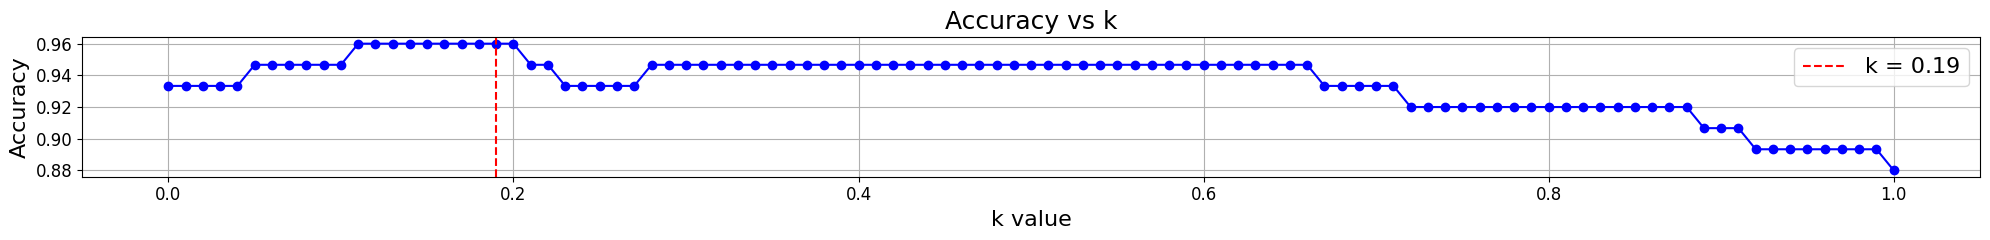

In [40]:
import matplotlib.pyplot as plt

# Sort the data by k to ensure correct plot
k_vals = sorted(k_values.keys())
acc_vals = [k_values[k] for k in k_vals]

# Plotting
plt.figure(figsize=(20, 2.5))  # Slightly taller to make text fit better
plt.plot(k_vals, acc_vals, marker='o', linestyle='-', color='blue')

plt.title("Accuracy vs k", fontsize=18)
plt.xlabel("k value", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.grid(True)

# Highlight max accuracy
max_acc = max(acc_vals)
max_k = k_vals[acc_vals.index(max_acc)]
plt.axvline(x=0.19, color='red', linestyle='--', label=f"k = {0.19}")
plt.legend(fontsize=16)

# Make tick labels larger
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

# Definitions for miniimagenet

In [15]:
mini_classes = ['organ', 'cocktail_shaker', 'goose', 'file', 'jellyfish', 'missile', 'coral_reef', 'black-footed_ferret', 'lipstick', 'rhinoceros_beetle', 'stage', 'theater_curtain', 'Newfoundland', 'scoreboard', 'robin', 'hotdog', 'upright', 'lion', 'unicycle', 'Saluki', 'solar_dish', 'rock_beauty', 'ashcan', 'hourglass', 'white_wolf', 'horizontal_bar', 'three-toed_sloth', 'prayer_rug', 'toucan', 'combination_lock', 'garbage_truck', 'malamute', 'mixing_bowl', 'house_finch', 'reel', 'tank', 'triceratops', 'consomme', 'miniature_poodle', 'nematode', 'carton', 'golden_retriever', 'poncho', 'miniskirt', 'king_crab', 'meerkat', 'electric_guitar', 'wok', 'dalmatian', 'tile_roof', 'ladybug', 'parallel_bars', 'catamaran', 'green_mamba', 'orange', 'dome', 'dugong', 'tobacco_shop', 'Gordon_setter', 'pencil_box', 'street_sign', 'barrel', 'fire_screen', 'yawl', 'Walker_hound', 'boxer', 'photocopier', 'cuirass', 'slot', 'harvestman', 'clog', 'bookshop', 'frying_pan', 'crate', 'aircraft_carrier', 'chime', 'Ibizan_hound', 'dishrag', 'iPod', 'holster', 'worm_fence', 'ear', 'vase', 'beer_bottle', 'spider_web', 'komondor', 'bolete', 'trifle', 'African_hunting_dog', 'cliff', 'oboe', 'carousel', 'cannon', 'French_bulldog', 'school_bus', 'Tibetan_mastiff', 'snorkel', 'ant', 'hair_slide', 'Arctic_fox']
for cls in mini_classes:
    defi = get_wordnet_definition(cls)
    print(f"'{cls}': {defi}")

'organ': ['a fully differentiated structural and functional unit in an animal that is specialized for some particular function', 'a government agency or instrument devoted to the performance of some specific function', '(music) an electronic simulation of a pipe organ', 'a periodical that is published by a special interest group', 'wind instrument whose sound is produced by means of pipes arranged in sets supplied with air from a bellows and controlled from a large complex musical keyboard', 'a free-reed instrument in which air is forced through the reeds by bellows']
'cocktail_shaker': ['a shaker for mixing cocktails']
'goose': ['web-footed long-necked typically gregarious migratory aquatic birds usually larger and less aquatic than ducks', 'a man who is a stupid incompetent fool', 'flesh of a goose (domestic or wild)', 'pinch in the buttocks', 'prod into action', 'give a spurt of fuel to']
'file': ['a set of related records (either written or electronic) kept together', 'a line of pe